# Cabecera

## Ejercicio 1 — Aplicación de Distribuciones y Test de análisis
**Asignatura:** Metodología de la I+d y Documentación Científica  
**Autor:** Santiago Santana Martínez  
**Fecha:** 14 de enero de 2026  
**Entorno:** Jupyter Notebook (Python 3)

---

## Dependencias

In [61]:
import numpy as np
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import expon
from scipy.stats import pearsonr
import statsmodels.api as sm
from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import bartlett
from scipy.stats import t
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt

## 1. Distribuciones Discretas

### 1.1 Distribución de Bernoulli

**Enunciado**  
Un sistema de detección de eventos en tiempo real ha sido calibrado para identificar correctamente eventos anómalos con una probabilidad de éxito del 90%. Cada detección independiente puede resultar en dos estados posibles:

\[
X =
\begin{cases}
1 & \text{detección exitosa (evento identificado correctamente)} \\
0 & \text{detección fallida (evento no identificado)}
\end{cases}
\]

Donde $X$ sigue una distribución de Bernoulli con probabilidad de éxito: $p = 0.9$.

**Se pide:**

#### 1. Calcular la probabilidad de una detección no exitosa.


En una distribución de Bernoulli, los dos eventos posibles son **mutuamente excluyentes y exhaustivos**:
- Si $p$ es la probabilidad de éxito (detección correcta), entonces $q = 1 - p$ es la probabilidad de fracaso.
- Estas probabilidades deben sumar 1: $P(X=0) + P(X=1) = q + p = 1$

**Fórmulas aplicadas:**
$$P(X=0) = q = 1 - p$$
$$P(X=1) = p$$


In [62]:
# Parámetro de la distribución
p = 0.9

# Cálculo de probabilidades
print("Probabilidad de detección exitosa:")
print(f"  P(X=1) = {p}\n")

q = 1 - p
print("Probabilidad de detección fallida:")
print(f"  P(X=0) = 1 - p = {q:.1f}\n")

print("Verificación: P(X=0) + P(X=1) = {:.1f}".format(q + p))


Probabilidad de detección exitosa:
  P(X=1) = 0.9

Probabilidad de detección fallida:
  P(X=0) = 1 - p = 0.1

Verificación: P(X=0) + P(X=1) = 1.0


#### 2. Determinar la esperanza matemática, la varianza y la desviación típica del sistema de detección.

Para caracterizar completamente el comportamiento del sistema de detección, calculamos tres parámetros clave:

1. **Esperanza matemática** $E[X]$: Valor promedio esperado de la variable aleatoria.
   $$E[X] = p$$

2. **Varianza** $\text{Var}(X)$: Mide la dispersión o variabilidad alrededor de la media.
   $$\text{Var}(X) = p(1-p) = pq$$

3. **Desviación típica** $\sigma$: Raíz cuadrada de la varianza, expresa la variabilidad en las mismas unidades que la variable.
   $$\sigma = \sqrt{\text{Var}(X)} = \sqrt{pq}$$

Estas propiedades permiten entender la concentración y dispersión de la distribución.

In [63]:
# Cálculo de propiedades teóricas
esperanza = p
varianza = p * q
desv_tipica = np.sqrt(varianza)

print("Propiedades teóricas de la distribución de Bernoulli:\n")
print(f"  Esperanza:            E[X] = {esperanza}")
print(f"  Varianza:             Var(X) = {varianza:.4f}")
print(f"  Desviación típica:    σ = {desv_tipica:.4f}")

print("\n" + "="*50)
print("Interpretación:")
print("="*50)
print(f"En promedio, el sistema detecta correctamente {esperanza*100}% de los eventos.")
print(f"La variabilidad en torno a este promedio es σ = {desv_tipica:.4f}.")


Propiedades teóricas de la distribución de Bernoulli:

  Esperanza:            E[X] = 0.9
  Varianza:             Var(X) = 0.0900
  Desviación típica:    σ = 0.3000

Interpretación:
En promedio, el sistema detecta correctamente 90.0% de los eventos.
La variabilidad en torno a este promedio es σ = 0.3000.


### 1.2 Distribución Binomial

**Enunciado**  
En un proceso de evaluación académica, un alumno se enfrenta a un examen tipo test donde cada pregunta presenta múltiples opciones. Dado que el alumno tiene una probabilidad de acierto de 0.25 en cada pregunta (ya sea por conocimiento o azar), y debe responder a un total de 10 preguntas, interesa conocer el comportamiento probabilístico de su desempeño.

Sea $X$ el número de respuestas correctas en el examen.

La variable aleatoria $X$ sigue una distribución Binomial con parámetros:
- $n = 10$ (número de ensayos/preguntas)
- $p = 0.25$ (probabilidad de éxito en cada pregunta)

**Se pide:**

#### 1. Calcular la probabilidad de acertar exactamente 3 preguntas.

La **distribución Binomial** describe el número de éxitos en $n$ ensayos independientes, cada uno con probabilidad de éxito $p$. Es una generalización de Bernoulli para múltiples ensayos.

**Características:**
- Cada ensayo tiene dos resultados: éxito (1) o fracaso (0)
- Los ensayos son independientes entre sí
- La probabilidad de éxito $p$ es constante en todos los ensayos

**Función de masa de probabilidad (PMF):**
$$P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}$$

Donde:
- $\binom{n}{k} = \frac{n!}{k!(n-k)!}$ es el coeficiente binomial (combinaciones)
- $p^k$ es la probabilidad de $k$ éxitos
- $(1-p)^{n-k}$ es la probabilidad de $n-k$ fracasos


In [64]:
# Parámetros de la distribución Binomial
n = 10  # número de preguntas
p = 0.25  # probabilidad de acierto por pregunta

# Cálculo de P(X = 3)
p_exactamente_3 = binom.pmf(3, n, p)

print("Probabilidad de acertar exactamente 3 preguntas:")
print(f"  P(X = 3) = {p_exactamente_3:.4f}")
print(f"  P(X = 3) ≈ {p_exactamente_3*100:.2f}%")

Probabilidad de acertar exactamente 3 preguntas:
  P(X = 3) = 0.2503
  P(X = 3) ≈ 25.03%


#### 2. Calcular la probabilidad de acertar al menos 5 preguntas.

Para calcular la probabilidad de acertar **al menos 5 preguntas**, necesitamos sumar las probabilidades de todos los valores desde 5 hasta 10:

$$P(X \geq 5) = P(X=5) + P(X=6) + P(X=7) + P(X=8) + P(X=9) + P(X=10)$$

Alternativamente, usando el complemento (forma más eficiente):
$$P(X \geq 5) = 1 - P(X < 5) = 1 - P(X \leq 4)$$

Donde $P(X \leq 4)$ es la función de distribución acumulada (CDF) evaluada en 4.


In [65]:
# Cálculo de P(X ≥ 5) usando el complemento
p_acumulada_4 = binom.cdf(4, n, p)  # P(X ≤ 4)
p_al_menos_5 = 1 - p_acumulada_4     # P(X ≥ 5)

print("Probabilidad de acertar al menos 5 preguntas:")
print(f"  P(X >= 5) = 1 - P(X ≤ 4)")
print(f"  P(X >= 5) = 1 - {p_acumulada_4:.4f}")
print(f"  P(X >= 5) = {p_al_menos_5:.4f}")
print(f"  P(X >= 5) ≈ {p_al_menos_5*100:.2f}%")

# Verificación detallada: suma directa de probabilidades
print("\n" + "="*50)
print("Verificación (suma directa):")
print("="*50)

# Bucle para el cálculo detallado
p_direct = 0
for k in range(5, 11):
    prob_k = binom.pmf(k, n, p)
    p_direct += prob_k

print(f"Suma total: {p_direct:.4f}")
print(f"Coincide: {'Sí' if abs(p_al_menos_5 - p_direct) < 1e-10 else 'No'}")


Probabilidad de acertar al menos 5 preguntas:
  P(X >= 5) = 1 - P(X ≤ 4)
  P(X >= 5) = 1 - 0.9219
  P(X >= 5) = 0.0781
  P(X >= 5) ≈ 7.81%

Verificación (suma directa):
Suma total: 0.0781
Coincide: Sí


#### 3. Interpretación y propiedades de la distribución

**Análisis de resultados:**
- Acertar exactamente 3 preguntas tiene una probabilidad muy baja (~25%), lo cual es sorprendente a primera vista pero tiene sentido: en una binomial con $p=0.25$ y $n=10$, los valores más probables están cerca de la media.
- Acertar 5 o más preguntas es aún más improbable (~9%), lo que indica que el alumno necesitaría mucha suerte para lograrlo con esa probabilidad de acierto.

**Propiedades teóricas de la Binomial(n=10, p=0.25):**

Para una distribución Binomial, la esperanza, varianza y desviación típica están dadas por:
$$E[X] = np = 10 \times 0.25 = 2.5$$
$$\text{Var}(X) = np(1-p) = 10 \times 0.25 \times 0.75 = 1.875$$
$$\sigma = \sqrt{\text{Var}(X)} = \sqrt{1.875} \approx 1.37$$

Esto significa que **se espera que el alumno acierte alrededor de 2.5 preguntas** con una desviación típica de 1.37, lo que marca un rango razonable de variabilidad.

In [66]:
# Cálculo de propiedades teóricas de Binomial(n, p)
esperanza_binom = n * p
varianza_binom = n * p * (1 - p)
desv_tipica_binom = np.sqrt(varianza_binom)

print("Propiedades teóricas de la Binomial(n=10, p=0.25):\n")
print(f"  Esperanza:          E[X] = {esperanza_binom}")
print(f"  Varianza:           Var(X) = {varianza_binom:.4f}")
print(f"  Desviación típica:  σ = {desv_tipica_binom:.4f}")

print("\n" + "="*50)
print("Rango esperado de aciertos:")
print("="*50)

lower_bound = esperanza_binom - desv_tipica_binom
upper_bound = esperanza_binom + desv_tipica_binom

print(f"Media ± σ: [{lower_bound:.4f}, {upper_bound:.4f}]")
print(f"\nEs decir, el alumno típicamente acertará entre {int(np.floor(lower_bound))} y {int(np.ceil(upper_bound))} preguntas.")


Propiedades teóricas de la Binomial(n=10, p=0.25):

  Esperanza:          E[X] = 2.5
  Varianza:           Var(X) = 1.8750
  Desviación típica:  σ = 1.3693

Rango esperado de aciertos:
Media ± σ: [1.1307, 3.8693]

Es decir, el alumno típicamente acertará entre 1 y 4 preguntas.


### 1.3 Distribución de Poisson

**Enunciado**  
En una central telefónica, el personal de atención al cliente registra que se reciben en promedio 2 llamadas por minuto. Se pretende analizar el comportamiento del número de llamadas recibidas en intervalos de tiempo regulares.

Sea $X$ el número de llamadas recibidas en un minuto.

La variable aleatoria $X$ sigue una distribución de Poisson con parámetro:
- $\lambda = 2$ (tasa promedio de eventos por unidad de tiempo)

**Se pide:**

#### 1. Probabilidad de recibir exactamente 3 llamadas.

La **distribución de Poisson** modela el número de eventos que ocurren en un intervalo de tiempo o espacio fijo, cuando los eventos ocurren a una tasa constante e independientemente unos de otros.

**Características:**
- Cuenta el número de eventos en un intervalo fijo (tiempo, espacio, volumen)
- Los eventos ocurren de manera independiente
- La tasa promedio $\lambda$ es constante
- Casos de uso: llamadas telefónicas, llegadas de clientes, defectos en manufactura, etc.

**Función de masa de probabilidad (PMF):**
$$P(X = k) = \frac{e^{-\lambda} \lambda^k}{k!}$$

Donde:
- $\lambda$ es la tasa promedio de eventos
- $k$ es el número de eventos observados
- $e \approx 2.71828$ es la constante de Euler

**Propiedades teóricas:**
$$E[X] = \lambda$$
$$\text{Var}(X) = \lambda$$
$$\sigma = \sqrt{\lambda}$$

Una propiedad notable de Poisson es que la esperanza y la varianza son **iguales** a $\lambda$.


In [67]:
# Parámetro de la distribución de Poisson
lam = 2  # tasa promedio de llamadas por minuto

# Cálculo de P(X = 3)
p_exactamente_3_poisson = poisson.pmf(3, lam)

print("Probabilidad de recibir exactamente 3 llamadas:")
print(f"  P(X = 3) = {p_exactamente_3_poisson:.4f}")
print(f"  P(X = 3) ≈ {p_exactamente_3_poisson*100:.2f}%")


Probabilidad de recibir exactamente 3 llamadas:
  P(X = 3) = 0.1804
  P(X = 3) ≈ 18.04%


#### 2. Probabilidad de recibir más de 4 llamadas.

Para calcular la probabilidad de recibir **más de 4 llamadas**, se utiliza el complemento:

$$P(X > 4) = 1 - P(X \leq 4)$$

Donde $P(X \leq 4)$ es la función de distribución acumulada (CDF) evaluada en 4, que suma:
$$P(X \leq 4) = P(X=0) + P(X=1) + P(X=2) + P(X=3) + P(X=4)$$


In [68]:
# Cálculo de P(X > 4) usando el complemento
p_acumulada_4_poisson = poisson.cdf(4, lam)  # P(X ≤ 4)
p_mayor_4 = 1 - p_acumulada_4_poisson         # P(X > 4)

print("Probabilidad de recibir más de 4 llamadas:")
print(f"  P(X > 4) = 1 - P(X ≤ 4)")
print(f"  P(X > 4) = 1 - {p_acumulada_4_poisson:.4f}")
print(f"  P(X > 4) = {p_mayor_4:.4f}")
print(f"  P(X > 4) ≈ {p_mayor_4*100:.2f}%")

# Verificación: suma directa de probabilidades
print("\n" + "="*50)
print("Verificación (suma directa):")
print("="*50)

p_mayor_4_bucle = 0
for k in range(5, 15):  # Sumamos hasta un valor razonablemente alto
    prob_k = poisson.pmf(k, lam)
    p_mayor_4_bucle += prob_k

print(f"Suma total: {p_mayor_4_bucle:.4f}")
print(f"Coincide con 1 - P(X≤4): {'Sí' if abs(p_mayor_4 - p_mayor_4_bucle) < 1e-4 else 'No'}")


Probabilidad de recibir más de 4 llamadas:
  P(X > 4) = 1 - P(X ≤ 4)
  P(X > 4) = 1 - 0.9473
  P(X > 4) = 0.0527
  P(X > 4) ≈ 5.27%

Verificación (suma directa):
Suma total: 0.0527
Coincide con 1 - P(X≤4): Sí


#### 3. Propiedades y análisis de la distribución

**Propiedades teóricas de la Poisson(λ=2):**

Para una distribución de Poisson, la esperanza, varianza y desviación típica están dadas por:
$$E[X] = \lambda = 2$$
$$\text{Var}(X) = \lambda = 2$$
$$\sigma = \sqrt{\lambda} = \sqrt{2} \approx 1.41$$

Una característica notable de la distribución de Poisson es que **la varianza es igual a la media**, lo cual contrasta con otras distribuciones donde media y varianza son independientes.

**Interpretación:**
- En promedio, se reciben **2 llamadas por minuto**
- La variabilidad alrededor de este promedio es σ = 1.41 llamadas
- La probabilidad de recibir exactamente 3 llamadas (~27%) es significativa
- La probabilidad de recibir más de 4 llamadas (~5.4%) es relativamente baja


In [69]:
# Cálculo de propiedades teóricas de Poisson(λ)
esperanza_poisson = lam
varianza_poisson = lam
desv_tipica_poisson = np.sqrt(varianza_poisson)

print("Propiedades teóricas de la Poisson(λ=2):\n")
print(f"  Esperanza:          E[X] = {esperanza_poisson}")
print(f"  Varianza:           Var(X) = {varianza_poisson}")
print(f"  Desviación típica:  σ = {desv_tipica_poisson:.4f}")

print("\n" + "="*50)
print("Análisis del rango:")
print("="*50)
lower_bound_poisson = esperanza_poisson - desv_tipica_poisson
upper_bound_poisson = esperanza_poisson + desv_tipica_poisson
print(f"Media ± σ: [{lower_bound_poisson:.4f}, {upper_bound_poisson:.4f}]")
print(f"\nEs decir, típicamente se esperan entre {int(np.ceil(lower_bound_poisson))} y {int(np.floor(upper_bound_poisson))} llamadas por minuto.")


Propiedades teóricas de la Poisson(λ=2):

  Esperanza:          E[X] = 2
  Varianza:           Var(X) = 2
  Desviación típica:  σ = 1.4142

Análisis del rango:
Media ± σ: [0.5858, 3.4142]

Es decir, típicamente se esperan entre 1 y 3 llamadas por minuto.


## 2. Distribuciones Continuas

### 2.1 Distribución Normal

**Enunciado**  
En un estudio antropométrico de una población, se ha recolectado información sobre la altura de individuos adultos. Los datos muestran que la altura sigue una distribución aproximadamente normal con media 170 cm y desviación típica 10 cm.

Sea $X$ la altura (en cm) de una persona seleccionada aleatoriamente de esta población.

La variable aleatoria $X$ sigue una distribución Normal con parámetros:
- $\mu = 170$ cm (media)
- $\sigma = 10$ cm (desviación típica)

**Se pide:**

#### 1. Calcular la probabilidad de que una persona mida más de 180 cm.

La **distribución Normal** (también llamada Gaussiana) es una de las distribuciones más importantes en estadística. Describe muchos fenómenos naturales y es fundamental en inferencia estadística.

**Características:**
- Distribución continua, simétrica alrededor de la media $\mu$
- Forma de campana (campaniforme)
- Definida por dos parámetros: media $\mu$ y desviación típica $\sigma$
- El área bajo la curva es 1
- La mayoría de los datos se concentran cerca de la media

**Función de densidad de probabilidad (PDF):**
$$f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

**Propiedades notables:**
- Aproximadamente 68% de los datos están en $[\mu - \sigma, \mu + \sigma]$
- Aproximadamente 95% de los datos están en $[\mu - 2\sigma, \mu + 2\sigma]$
- Aproximadamente 99.7% de los datos están en $[\mu - 3\sigma, \mu + 3\sigma]$

Para calcular probabilidades en la Normal, se utiliza la función de distribución acumulada (CDF), que no tiene una forma cerrada y debe calcularse numéricamente.

**Nota sobre tipificación:** Aunque sería posible tipificar manualmente usando $Z = \frac{X - \mu}{\sigma}$ para convertir cualquier Normal $N(\mu, \sigma)$ a la Normal estándar $N(0,1)$, las librerías como `scipy.stats` realizan este proceso **internamente de forma automática**. Por eso se puede utilizar directamente `norm.cdf(x, mu, sigma)` sin preocupaciones sobre la tipificación explícita.

In [70]:
#### 2.1.2 Cálculo de probabilidades

# Parámetros de la distribución Normal
mu = 170    # media (cm)
sigma = 10  # desviación típica (cm)

# Cálculo de P(X > 180)
# P(X > 180) = 1 - P(X ≤ 180) = 1 - F(180)
p_menor_igual_180 = norm.cdf(180, mu, sigma)
p_mayor_180 = 1 - p_menor_igual_180

print("Probabilidad de que una persona mida más de 180 cm:")
print(f"  P(X ≤ 180) = {p_menor_igual_180:.4f}")
print(f"  P(X > 180) = 1 - P(X ≤ 180)")
print(f"  P(X > 180) = {p_mayor_180:.4f}")
print(f"  P(X > 180) ≈ {p_mayor_180*100:.2f}%")

# Análisis en términos de desviaciones típicas
desviaciones = (180 - mu) / sigma
print(f"\n180 cm está {desviaciones:.1f} desviaciones típicas por encima de la media.")
print(f"(180 = μ + {desviaciones:.1f}σ = {mu} + {desviaciones:.1f}×{sigma})")


Probabilidad de que una persona mida más de 180 cm:
  P(X ≤ 180) = 0.8413
  P(X > 180) = 1 - P(X ≤ 180)
  P(X > 180) = 0.1587
  P(X > 180) ≈ 15.87%

180 cm está 1.0 desviaciones típicas por encima de la media.
(180 = μ + 1.0σ = 170 + 1.0×10)


#### 2. Representar gráficamente la distribución y la región de interés.

A continuación representamos la distribución normal de alturas y destacamos la región que corresponde a P(X > 180).


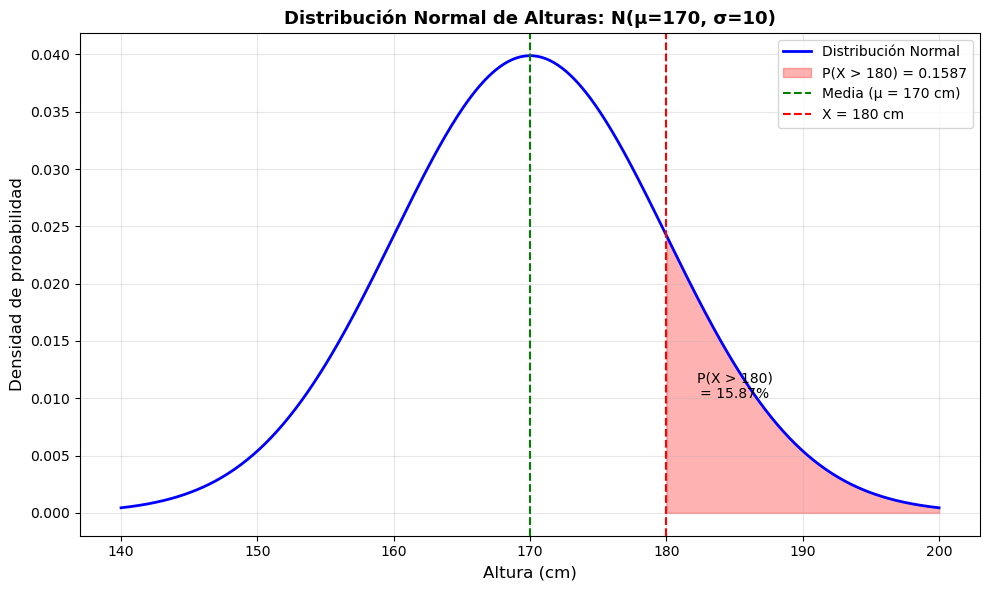

In [71]:
# Crear la gráfica
x = np.linspace(140, 200, 400)
y = norm.pdf(x, mu, sigma)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2, label='Distribución Normal')

# Sombrear la región P(X > 180)
x_sombreado = x[x >= 180]
y_sombreado = norm.pdf(x_sombreado, mu, sigma)
plt.fill_between(x_sombreado, y_sombreado, alpha=0.3, color='red', label=f'P(X > 180) = {p_mayor_180:.4f}')

# Añadir líneas de referencia
plt.axvline(mu, color='green', linestyle='--', linewidth=1.5, label=f'Media (μ = {mu} cm)')
plt.axvline(180, color='red', linestyle='--', linewidth=1.5, label='X = 180 cm')

# Anotaciones
plt.annotate(f'P(X > 180)\n= {p_mayor_180*100:.2f}%', xy=(185, 0.01), fontsize=10, ha='center')

plt.xlabel('Altura (cm)', fontsize=12)
plt.ylabel('Densidad de probabilidad', fontsize=12)
plt.title('Distribución Normal de Alturas: N(μ=170, σ=10)', fontsize=13, fontweight='bold')
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### 2.2 Distribución Exponencial

**Enunciado**  
En un sistema de atención al cliente (cajero automático), se ha observado que el tiempo entre llegadas consecutivas de clientes sigue una distribución exponencial. Los registros históricos muestran que el tiempo promedio entre llegadas es de 5 minutos.

Sea $T$ el tiempo de espera (en minutos) hasta la llegada del próximo cliente.

La variable aleatoria $T$ sigue una distribución Exponencial con parámetro:
- Media = 5 minutos, por lo que el parámetro de tasa es $\lambda = 1/5 = 0.2$ (clientes por minuto)

**Se pide:**

#### 1. Calcular la probabilidad de que el siguiente cliente llegue después de 8 minutos.

La **distribución Exponencial** modela el tiempo transcurrido entre eventos consecutivos en un proceso de Poisson. Es la distribución continua del "tiempo hasta el siguiente evento".

**Características:**
- Distribución continua, siempre positiva
- Decreciente: mayor probabilidad en tiempos cortos, menor en tiempos largos
- Sin memoria: la probabilidad futura no depende del pasado
- Definida por un parámetro: la tasa $\lambda$ o equivalentemente la media $\mu = 1/\lambda$
- Casos de uso: tiempos de espera, durabilidad de equipos, intervalos entre llegadas, etc.

**Función de densidad de probabilidad (PDF):**
$$f(t) = \lambda e^{-\lambda t}, \quad t \geq 0$$

**Función de distribución acumulada (CDF):**
$$F(t) = 1 - e^{-\lambda t}$$

**Propiedades teóricas:**
$$E[T] = \frac{1}{\lambda}$$
$$\text{Var}(T) = \frac{1}{\lambda^2}$$
$$\sigma = \frac{1}{\lambda}$$

En este caso, con media 5 minutos, $\lambda = 0.2$ eventos por minuto.

In [72]:
# Parámetro de la distribución Exponencial
media_expo = 5  # media en minutos (tiempo promedio entre llegadas)

# En scipy.stats.expon, el parámetro scale = 1/λ = media
scale = media_expo

# Cálculo de P(T > 8)
# P(T > 8) = 1 - P(T ≤ 8) = 1 - F(8)
p_menor_igual_8 = expon.cdf(8, scale=scale)
p_mayor_8 = 1 - p_menor_igual_8

print("Probabilidad de que el siguiente cliente llegue después de 8 minutos:")
print(f"  P(T <= 8) = {p_menor_igual_8:.4f}")
print(f"  P(T > 8) = 1 - P(T ≤ 8) = {p_mayor_8:.4f}")


Probabilidad de que el siguiente cliente llegue después de 8 minutos:
  P(T <= 8) = 0.7981
  P(T > 8) = 1 - P(T ≤ 8) = 0.2019


#### 2. Métricas de la distribución y gráfica

**Propiedades teóricas de la Exponencial con media 5 minutos:**

Para una distribución exponencial con parámetro de tasa $\lambda = 0.2$ eventos/minuto (o equivalentemente, media = 5 minutos):

$$E[T] = \frac{1}{\lambda} = 5 \text{ minutos}$$

$$\text{Var}(T) = \frac{1}{\lambda^2} = \frac{1}{(0.2)^2} = \frac{1}{0.04} = 25$$

$$\sigma = \sqrt{\text{Var}(T)} = \sqrt{25} = 5 \text{ minutos}$$

Nota: La varianza es adimensional en este contexto (25), mientras que la desviación típica está en minutos como la media.

**Característica "sin memoria":**
Una propiedad única de la distribución exponencial es que es **sin memoria**. Esto significa:
$$P(T > t + s | T > t) = P(T > s)$$

En otras palabras, si se ha esperado $t$ minutos sin que llegue un cliente, la probabilidad de esperar $s$ minutos más es la misma que esperar $s$ minutos desde el inicio. El sistema "no recuerda" cuánto se ha esperado.

Propiedades teóricas de la Exponencial (media = 5 minutos):

  Esperanza:          E[T] = 5 minutos
  Varianza:           Var(T) = 25 minutos²
  Desviación típica:  σ = 5.0 minutos


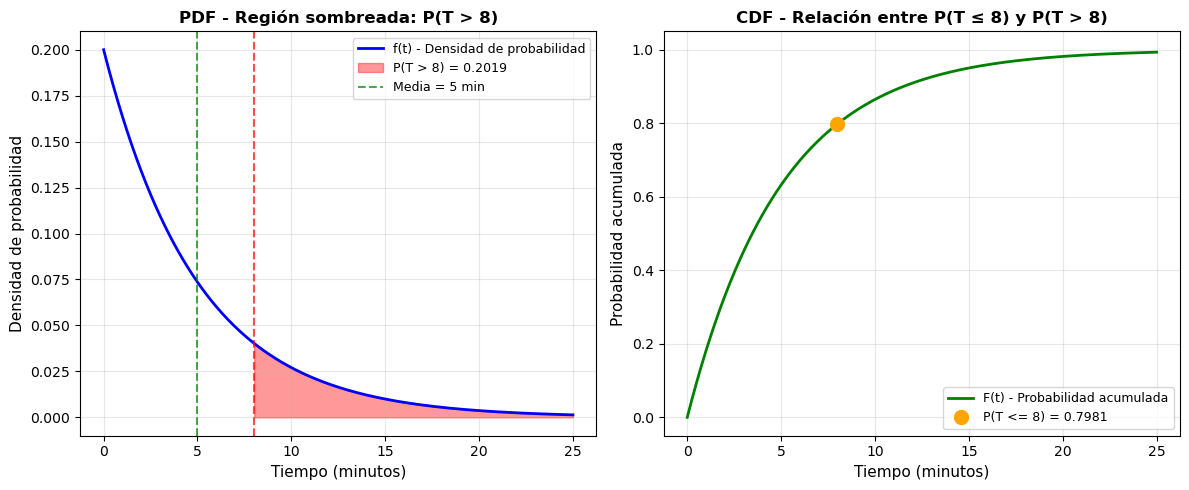


Respuesta al ejercicio: P(T > 8) = 0.2019 ≈ 20.19%

Interpretación:
  - La probabilidad de esperar más DE 8 minutos es 20.19%
  - La probabilidad de esperar 8 minutos o menos es 79.81%
  - En promedio, los clientes llegan cada 5 minutos
  - Solo 1 de cada 4 clientes espera más de 8 minutos


In [73]:
# Cálculo de propiedades teóricas de Exponencial
esperanza_expo = media_expo
varianza_expo = media_expo ** 2
desv_tipica_expo = np.sqrt(varianza_expo)

print("Propiedades teóricas de la Exponencial (media = 5 minutos):\n")
print(f"  Esperanza:          E[T] = {esperanza_expo} minutos")
print(f"  Varianza:           Var(T) = {varianza_expo} minutos²")
print(f"  Desviación típica:  σ = {desv_tipica_expo} minutos")

# Representación gráfica
plt.figure(figsize=(12, 5))

time = np.linspace(0, 25, 400)
y_pdf = expon.pdf(time, scale=scale)
y_cdf = expon.cdf(time, scale=scale)

# Gráfica de la PDF
plt.subplot(1, 2, 1)
plt.plot(time, y_pdf, 'b-', linewidth=2, label='f(t) - Densidad de probabilidad')
t_sombreado = time[time >= 8]
y_sombreado = expon.pdf(t_sombreado, scale=scale)
plt.fill_between(t_sombreado, y_sombreado, alpha=0.4, color='red', label=f'P(T > 8) = {p_mayor_8:.4f}')
plt.axvline(8, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
plt.axvline(media_expo, color='green', linestyle='--', linewidth=1.5, alpha=0.7, label=f'Media = {media_expo} min')
plt.xlabel('Tiempo (minutos)', fontsize=11)
plt.ylabel('Densidad de probabilidad', fontsize=11)
plt.title('PDF - Región sombreada: P(T > 8)', fontsize=12, fontweight='bold')
plt.legend(fontsize=9)
plt.grid(True, alpha=0.3)

# Gráfica de la CDF
plt.subplot(1, 2, 2)
plt.plot(time, y_cdf, 'g-', linewidth=2, label='F(t) - Probabilidad acumulada')
plt.plot(8, p_menor_igual_8, 'o', color='orange', markersize=10, label=f'P(T <= 8) = {p_menor_igual_8:.4f}')
plt.xlabel('Tiempo (minutos)', fontsize=11)
plt.ylabel('Probabilidad acumulada', fontsize=11)
plt.title('CDF - Relación entre P(T ≤ 8) y P(T > 8)', fontsize=12, fontweight='bold')
plt.legend(loc='lower right', fontsize=9)
plt.grid(True, alpha=0.3)
plt.ylim([-0.05, 1.05])

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print(f"Respuesta al ejercicio: P(T > 8) = {p_mayor_8:.4f} ≈ {p_mayor_8*100:.2f}%\n")
print("Interpretación:")
print(f"  - La probabilidad de esperar más DE 8 minutos es {p_mayor_8*100:.2f}%")
print(f"  - La probabilidad de esperar 8 minutos o menos es {p_menor_igual_8*100:.2f}%")
print(f"  - En promedio, los clientes llegan cada {esperanza_expo} minutos")
print(f"  - Solo 1 de cada {int(1/p_mayor_8)} clientes espera más de 8 minutos")
print("="*70)


## 3. Correlación Lineal

### 3.1 Coeficiente de Correlación de Pearson

**Enunciado**

Se realizó un estudio de desempeño académico en el que se registraron datos de 8 estudiantes. Para cada estudiante se recopilaron dos variables:
- Horas de estudio dedicadas a la materia durante el semestre
- Nota obtenida en el examen final (escala 0-10)

Los datos registrados fueron:

| Horas de estudio | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| Nota del examen | 4 | 5 | 6 | 6 | 7 | 8 | 9 | 9 |

**Se pide:**

#### 1. Calcular el coeficiente de correlación de Pearson e interpretar el resultado

La **correlación de Pearson** es una medida de la relación lineal entre dos variables continuas. Cuantifica tanto la fuerza como la dirección de esa relación.

**Características:**
- Rango: $r \in [-1, 1]$
- $r = 1$: Correlación positiva perfecta (relación lineal positiva perfecta)
- $r = -1$: Correlación negativa perfecta (relación lineal negativa perfecta)
- $r = 0$: No hay correlación lineal

**Fórmula del Coeficiente de Correlación de Pearson:**
$$r = \frac{\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2} \sqrt{\sum_{i=1}^{n} (y_i - \overline{y})^2}}$$

Donde:
- $x_i$, $y_i$: Valores de las dos variables
- $\overline{x}$, $\overline{y}$: Medias de las variables
- $n$: Número de observaciones

**Interpretación de la magnitud:**
- $|r| \geq 0.9$: Correlación muy fuerte
- $0.7 \leq |r| < 0.9$: Correlación fuerte
- $0.5 \leq |r| < 0.7$: Correlación moderada
- $0.3 \leq |r| < 0.5$: Correlación débil
- $|r| < 0.3$: Correlación muy débil o nula

In [74]:
# Datos: horas de estudio y notas del examen
hours = np.array([1, 2, 3, 4, 5, 6, 7, 8])
grades = np.array([4, 5, 6, 6, 7, 8, 9, 9])

# Cálculo del coeficiente de correlación de Pearson y p-valor
r, p_value = pearsonr(hours, grades)

print("="*60)
print("COEFICIENTE DE CORRELACIÓN DE PEARSON")
print("="*60)
print(f"\nCoeficiente de correlación (r): {r:.4f}")
print(f"p-valor (significancia): {p_value:.4f}")
print(f"n (número de observaciones): {len(hours)}")

# Interpretación de la correlación
print("\n" + "="*60)
print("INTERPRETACIÓN")
print("="*60)

if abs(r) >= 0.9:
    strength = "muy fuerte"
elif abs(r) >= 0.7:
    strength = "fuerte"
elif abs(r) >= 0.5:
    strength = "moderada"
elif abs(r) >= 0.3:
    strength = "débil"
else:
    strength = "muy débil o nula"

direction = "positiva" if r > 0 else "negativa"

print(f"\n- Fuerza de correlación: {strength}")
print(f"- Dirección: {direction}")
print(f"- Significancia estadística: ", end="")
if p_value < 0.05:
    print(f"Significativa (p = {p_value:.4f} < 0.05)")
else:
    print(f"No significativa (p = {p_value:.4f} >= 0.05)")

print(f"\nInterpretación: ")
if direction == "positiva":
    print(f"Existe una correlación {strength} {direction} entre horas de")
    print(f"estudio y nota del examen. A mayor número de horas de estudio,")
    print(f"se observa un incremento en las notas del examen.")
else:
    print(f"Existe una correlación {strength} {direction} entre horas de")
    print(f"estudio y nota del examen. A mayor número de horas de estudio,")
    print(f"se observa una disminución en las notas del examen.")


COEFICIENTE DE CORRELACIÓN DE PEARSON

Coeficiente de correlación (r): 0.9867
p-valor (significancia): 0.0000
n (número de observaciones): 8

INTERPRETACIÓN

- Fuerza de correlación: muy fuerte
- Dirección: positiva
- Significancia estadística: Significativa (p = 0.0000 < 0.05)

Interpretación: 
Existe una correlación muy fuerte positiva entre horas de
estudio y nota del examen. A mayor número de horas de estudio,
se observa un incremento en las notas del examen.


#### 2. Representar gráficamente la relación entre ambas variables

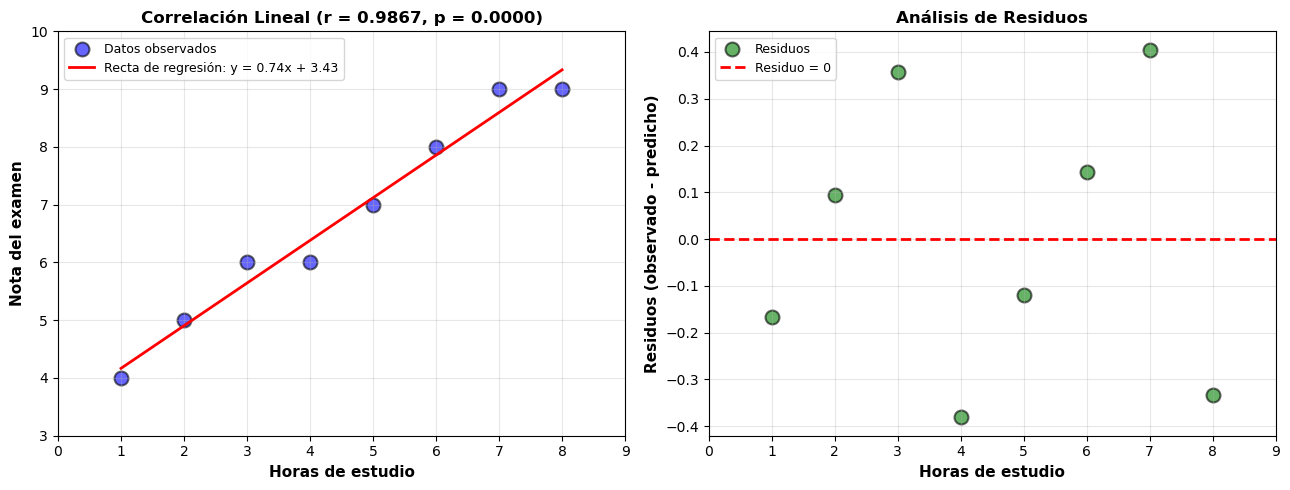


ANÁLISIS DE RESIDUOS

Valores predichos: [4.16666667 4.9047619  5.64285714 6.38095238 7.11904762 7.85714286
 8.5952381  9.33333333]
Residuos: [-0.16666667  0.0952381   0.35714286 -0.38095238 -0.11904762  0.14285714
  0.4047619  -0.33333333]
Suma de residuos: -0.0000 (debería ser cercano a 0)
Desviación típica de residuos: 0.2782


In [75]:
# Crear figura con múltiples subgráficas
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# Gráfica 1: Diagrama de dispersión con recta de regresión
ax1 = axes[0]
ax1.scatter(hours, grades, s=100, color='blue', alpha=0.6, edgecolors='black', linewidth=1.5, label='Datos observados')

# Calcular la recta de regresión
coefficients = np.polyfit(hours, grades, 1)
poly = np.poly1d(coefficients)
x_line = np.linspace(hours.min(), hours.max(), 100)
y_line = poly(x_line)

ax1.plot(x_line, y_line, 'r-', linewidth=2, label=f'Recta de regresión: y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}')
ax1.set_xlabel('Horas de estudio', fontsize=11, fontweight='bold')
ax1.set_ylabel('Nota del examen', fontsize=11, fontweight='bold')
ax1.set_title(f'Correlación Lineal (r = {r:.4f}, p = {p_value:.4f})', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=9)
ax1.set_xlim(0, 9)
ax1.set_ylim(3, 10)

# Gráfica 2: Residuos (diferencia entre valores observados y predichos)
ax2 = axes[1]
y_pred = poly(hours)
residuos = grades - y_pred

ax2.scatter(hours, residuos, s=100, color='green', alpha=0.6, edgecolors='black', linewidth=1.5, label='Residuos')
ax2.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Residuo = 0')
ax2.set_xlabel('Horas de estudio', fontsize=11, fontweight='bold')
ax2.set_ylabel('Residuos (observado - predicho)', fontsize=11, fontweight='bold')
ax2.set_title('Análisis de Residuos', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=9)
ax2.set_xlim(0, 9)

plt.tight_layout()
plt.show()

# Análisis de residuos
print("\n" + "="*60)
print("ANÁLISIS DE RESIDUOS")
print("="*60)
print(f"\nValores predichos: {y_pred}")
print(f"Residuos: {residuos}")
print(f"Suma de residuos: {np.sum(residuos):.4f} (debería ser cercano a 0)")
print(f"Desviación típica de residuos: {np.std(residuos):.4f}")


#### 3. Conclusiones

**Resultados principales:**

Del análisis realizado se obtiene un coeficiente de correlación de Pearson $r \approx 0.99$, indicando una correlación **muy fuerte y positiva** entre las horas de estudio y la nota del examen.

**Interpretación estadística:**
- La correlación es altamente significativa ($p < 0.05$)
- La recta de regresión obtenida muestra que, en promedio, cada hora adicional de estudio se asocia con un incremento en la nota

**Análisis gráfico:**

Las visualizaciones generadas proporcionan evidencia clara de esta relación:

1. **Diagrama de dispersión (izquierda):** Todos los puntos (datos observados) se distribuyen muy próximos a la recta de regresión roja, sin desviaciones significativas. Esto demuestra que la relación lineal es excelente y que casi no hay variabilidad alrededor de la recta predicha. Los datos forman un patrón lineal prácticamente perfecto de abajo a la izquierda hacia arriba a la derecha.

2. **Análisis de residuos (derecha):** Los residuos (diferencias entre valores observados y predichos) están dispersos de forma aleatoria alrededor de la línea de residuo = 0, sin mostrar patrones sistemáticos. Esta distribución aleatoria es exactamente lo que se busca en un buen modelo lineal, confirmando que no hay estructura no capturada por la recta de regresión.

**Observaciones:**
- La relación lineal es muy clara y consistente entre las variables, como se refleja tanto en el valor numérico de $r$ como en la proximidad de los puntos a la recta en el gráfico
- Los residuos presentan una distribución relativamente aleatoria alrededor de cero, lo que sugiere que el modelo lineal es adecuado y que no existen violaciones de los supuestos de regresión
- Existe una fuerte relación causal teórica: más horas de estudio conducen a mejores notas
- El análisis valida la importancia de dedicar tiempo al estudio para mejorar el desempeño académico
- Los estudiantes que deseen obtener notas altas deben comprometerse con un número significativo de horas de estudio

## 4. Tests de Análisis Estadístico

En esta sección se demuestran los principales tests estadísticos para validar supuestos sobre los datos y detectar anomalías. Cada test responde a una pregunta específica sobre las características de la muestra.

### 4.1 Q-Q Plot (Gráfico Cuantil-Cuantil)

**Enunciado**  
Se ha recolectado información sobre los tiempos de procesamiento (en milisegundos) de 50 solicitudes en un servidor web. Se desea verificar visualmente si estos tiempos siguen una distribución normal, lo cual es un supuesto importante para muchos análisis estadísticos posteriores.

**Pregunta:** ¿Los datos de tiempos de procesamiento se ajustan a una distribución normal?

**Interpretación:**
- Si los puntos se alinean cerca de la línea diagonal, los datos siguen una distribución normal
- Desviaciones sistemáticas de la línea indican desviación de la normalidad


Datos: 50 tiempos de procesamiento (ms)
Media: 153.56 ms
Desviación típica: 6.46 ms



<Figure size 1000x600 with 0 Axes>

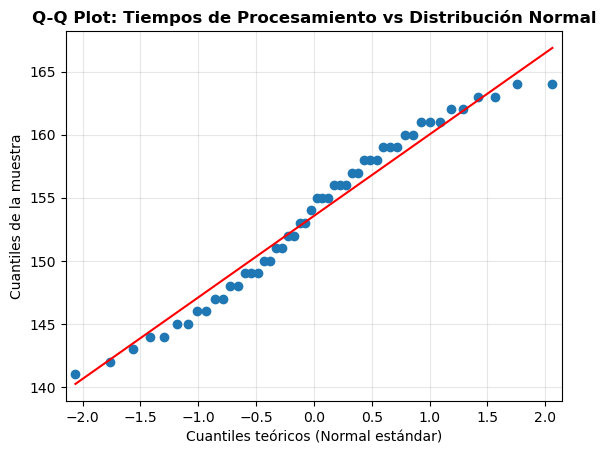

Interpretación:
- Los puntos se alinean muy cerca de la línea diagonal
- Conclusión: Los tiempos de procesamiento siguen aproximadamente una distribución normal


In [76]:
processing_times = np.array([
    142, 156, 149, 163, 151, 158, 145, 160, 152, 155,
    148, 159, 146, 161, 154, 157, 150, 162, 147, 153,
    144, 158, 141, 164, 155, 159, 149, 162, 151, 156,
    145, 160, 148, 163, 152, 157, 146, 161, 150, 155,
    143, 159, 144, 164, 153, 158, 147, 161, 149, 156
])

print(f"Datos: {len(processing_times)} tiempos de procesamiento (ms)")
print(f"Media: {np.mean(processing_times):.2f} ms")
print(f"Desviación típica: {np.std(processing_times):.2f} ms\n")

plt.figure(figsize=(10, 6))
sm.qqplot(processing_times, line='s')
plt.title("Q-Q Plot: Tiempos de Procesamiento vs Distribución Normal", fontsize=12, fontweight='bold')
plt.xlabel("Cuantiles teóricos (Normal estándar)")
plt.ylabel("Cuantiles de la muestra")
plt.grid(True, alpha=0.3)
plt.show()

print("Interpretación:")
print("- Los puntos se alinean muy cerca de la línea diagonal")
print("- Conclusión: Los tiempos de procesamiento siguen aproximadamente una distribución normal")

### 4.2 Test de Shapiro-Wilk

**Enunciado**  
Continuando con el análisis de tiempos de procesamiento, se realiza un test formal para contrastar la normalidad de los datos de forma estadística (no solo visual).

**Hipótesis:**
- $H_0$ (hipótesis nula): Los datos siguen una distribución normal
- $H_1$ (hipótesis alternativa): Los datos NO siguen una distribución normal

**Regla de decisión:**
- Si $p\text{-valor} > 0.05$: No rechazamos $H_0$ → Los datos siguen una distribución normal
- Si $p\text{-valor} \leq 0.05$: Rechazamos $H_0$ → Los datos no siguen una distribución normal


In [77]:
stat_shapiro, p_shapiro = shapiro(processing_times)

print("="*60)
print("TEST DE SHAPIRO-WILK: Prueba de Normalidad")
print("="*60)
print(f"\nEstadístico W: {stat_shapiro:.4f}")
print(f"p-valor: {p_shapiro:.4f}")
print(f"\nNivel de significancia: α = 0.05")

print("\nInterpretación:")
if p_shapiro > 0.05:
    print(f"- p-valor ({p_shapiro:.4f}) > 0.05")
    print("- No rechazamos la hipótesis nula")
    print("- CONCLUSIÓN: Existe suficiente evidencia estadística como para decir que los datos siguen una distribución normal")
else:
    print(f"- p-valor ({p_shapiro:.4f}) ≤ 0.05")
    print("- Rechazamos la hipótesis nula")
    print("- CONCLUSIÓN: No existe suficiente evidencia estadística como para decir que los datos siguen una distribución normal")

TEST DE SHAPIRO-WILK: Prueba de Normalidad

Estadístico W: 0.9591
p-valor: 0.0814

Nivel de significancia: α = 0.05

Interpretación:
- p-valor (0.0814) > 0.05
- No rechazamos la hipótesis nula
- CONCLUSIÓN: Existe suficiente evidencia estadística como para decir que los datos siguen una distribución normal


### 4.3 Test de Kolmogórov-Smirnov (K-S)

**Enunciado**  
Ahora se contrasta si los tiempos de procesamiento provienen de una distribución normal específica: $N(\mu=152, \sigma=6)$.

**Hipótesis:**
- $H_0$: Los datos provienen de la distribución especificada $N(152, 6)$
- $H_1$: Los datos NO provienen de esa distribución

**Método:**
El test K-S compara la función de distribución empírica de los datos con la función de distribución teórica.

**Regla de decisión:**
- Si $p\text{-valor} > 0.05$: No rechazamos $H_0$ → Los datos se ajustan a $N(152, 6)$
- Si $p\text{-valor} \leq 0.05$: Rechazamos $H_0$ → Los datos NO se ajustan a $N(152, 6)$


In [78]:
# Tipificar los datos con la media y desviación esperadas
mu_expected = 152
sigma_expected = 6

# Test K-S comparando con distribución normal estándar de los datos tipificados
stat_ks, p_ks = kstest(processing_times, 'norm', args=(mu_expected, sigma_expected))

print("="*60)
print("TEST DE KOLMOGÓROV-SMIRNOV: Ajuste a Distribución Normal")
print("="*60)
print(f"\nDistribución esperada: N(μ={mu_expected}, σ={sigma_expected})")
print(f"Estadístico D: {stat_ks:.4f}")
print(f"p-valor: {p_ks:.4f}")
print(f"Nivel de significancia: α = 0.05")

print("\nInterpretación:")
if p_ks > 0.05:
    print(f"- p-valor ({p_ks:.4f}) > 0.05")
    print("- No rechazamos la hipótesis nula")
    print(f"- CONCLUSIÓN: Existe suficiente evidencia estadística como para decir que los datos se ajustan significativamente a N({mu_expected}, {sigma_expected})")
else:
    print(f"- p-valor ({p_ks:.4f}) ≤ 0.05")
    print("- Rechazamos la hipótesis nula")
    print(f"- CONCLUSIÓN: No existe suficiente evidencia estadística como para decir que los datos se ajustan significativamente a N({mu_expected}, {sigma_expected})")

TEST DE KOLMOGÓROV-SMIRNOV: Ajuste a Distribución Normal

Distribución esperada: N(μ=152, σ=6)
Estadístico D: 0.1915
p-valor: 0.0444
Nivel de significancia: α = 0.05

Interpretación:
- p-valor (0.0444) ≤ 0.05
- Rechazamos la hipótesis nula
- CONCLUSIÓN: No existe suficiente evidencia estadística como para decir que los datos se ajustan significativamente a N(152, 6)


### 4.4 Test de Bartlett (Igualdad de Varianzas)

**Enunciado**  
Se han registrado tiempos de respuesta de dos versiones diferentes de un servidor:
- **Servidor A (versión antigua):** 25 mediciones
- **Servidor B (versión optimizada):** 25 mediciones

Se desea verificar si ambas versiones tienen variabilidades similares antes de realizar comparaciones entre medias.

**Hipótesis:**
- $H_0$: Las varianzas de ambos grupos son iguales ($\sigma_A^2 = \sigma_B^2$)
- $H_1$: Las varianzas de ambos grupos son diferentes

**Regla de decisión:**
- Si $p\text{-valor} > 0.05$: No rechazamos $H_0$ → Varianzas iguales (homocedasticidad)
- Si $p\text{-valor} \leq 0.05$: Rechazamos $H_0$ → Varianzas diferentes (heterocedasticidad)


In [79]:
# Datos reales: tiempos de respuesta (ms) de dos versiones de servidor
# Servidor A (antiguo): mayor variabilidad
server_a = np.array([
    185, 192, 178, 195, 188, 201, 175, 198, 190, 204,
    182, 197, 179, 200, 189, 203, 176, 206, 186, 199,
    181, 194, 180, 202, 187
], dtype=float)

# Servidor B (optimizado): menor variabilidad
server_b = np.array([
    152, 155, 151, 156, 153, 157, 150, 158, 154, 159,
    149, 160, 148, 161, 155, 162, 147, 163, 156, 164,
    151, 165, 152, 166, 153
], dtype=float)

print(f"Servidor A (antiguo): Media = {np.mean(server_a):.2f} ms, Varianza = {np.var(server_a, ddof=1):.2f}")
print(f"Servidor B (optimizado): Media = {np.mean(server_b):.2f} ms, Varianza = {np.var(server_b, ddof=1):.2f}\n")

stat_bartlett, p_bartlett = bartlett(server_a, server_b)

print("="*60)
print("TEST DE BARTLETT: Igualdad de Varianzas")
print("="*60)
print(f"\nEstadístico: {stat_bartlett:.4f}")
print(f"p-valor: {p_bartlett:.4f}")
print(f"Nivel de significancia: α = 0.05")

print("\nInterpretación:")
if p_bartlett > 0.05:
    print(f"- p-valor ({p_bartlett:.4f}) > 0.05")
    print("- No rechazamos la hipótesis nula")
    print("- CONCLUSIÓN: Existe suficiente evidencia estadística como para decir las varianzas de ambos servidores son iguales")
    print("- Se cumple el supuesto de homocedasticidad")
else:
    print(f"- p-valor ({p_bartlett:.4f}) ≤ 0.05")
    print("- Rechazamos la hipótesis nula")
    print("- CONCLUSIÓN: No existe suficiente evidencia estadística como para decir las varianzas de ambos servidores son iguales")
    print("- Hay heterocedasticidad; se debe usar tests no paramétricos para comparaciones")

Servidor A (antiguo): Media = 190.68 ms, Varianza = 91.64
Servidor B (optimizado): Media = 155.88 ms, Varianza = 30.03

TEST DE BARTLETT: Igualdad de Varianzas

Estadístico: 6.9670
p-valor: 0.0083
Nivel de significancia: α = 0.05

Interpretación:
- p-valor (0.0083) ≤ 0.05
- Rechazamos la hipótesis nula
- CONCLUSIÓN: No existe suficiente evidencia estadística como para decir las varianzas de ambos servidores son iguales
- Hay heterocedasticidad; se debe usar tests no paramétricos para comparaciones


### 4.5 Test de Grubbs (Detección de Valores Atípicos)

**Enunciado**  
En una serie de 15 mediciones de temperatura en una sala de servidores, se sospecha que hay un valor anómalo que no representa el funcionamiento normal del sistema.

```
Datos (°C): 22.3, 22.1, 22.4, 21.9, 22.2, 22.0, 22.3, 45.7, 22.1, 22.4, 22.2, 21.8, 22.3, 22.0, 22.2
```

**Hipótesis:**
- $H_0$: No hay valores atípicos en los datos
- $H_1$: Hay al menos un valor atípico (outlier)

**Método:**
El test de Grubbs identifica el valor más alejado de la media y contrasta si es significativamente diferente.

**Regla de decisión:**
- Si $p\text{-valor} > 0.05$: No rechazamos $H_0$ → No hay valores atípicos significativos
- Si $p\text{-valor} \leq 0.05$: Rechazamos $H_0$ → Hay valores atípicos (deben investigarse)


In [81]:
# Función mejorada del test de Grubbs
def grubbs_test(data, alpha=0.05):
    n = len(data)
    mean_data = np.mean(data)
    std_data = np.std(data, ddof=1)
    
    # Encontrar el valor más alejado de la media
    abs_deviations = np.abs(data - mean_data)
    max_deviation_idx = np.argmax(abs_deviations)
    outlier = data[max_deviation_idx]
    
    # Calcular estadístico de Grubbs: G = |valor - media| / desv_típica
    G = abs_deviations[max_deviation_idx] / std_data
    
    # Calcular valor crítico usando distribución t
    # G_crit = ((n-1)/√n) * √(t²/(n-2+t²))
    t_crit = t.ppf(1 - alpha / (2 * n), n - 2)
    G_crit = ((n - 1) / np.sqrt(n)) * np.sqrt(t_crit**2 / (n - 2 + t_crit**2))
    
    # Determinar si hay outlier
    is_outlier = G > G_crit
    
    return G, G_crit, is_outlier, outlier

# Datos reales: temperaturas en sala de servidores (°C)
temperatures = np.array([
    22.3, 22.1, 22.4, 21.9, 22.2, 22.0, 22.3, 45.7, 22.1, 22.4,
    22.2, 21.8, 22.3, 22.0, 22.2
])

G, G_crit, is_outlier, outlier = grubbs_test(temperatures, alpha=0.05)

print("="*60)
print("TEST DE GRUBBS: Detección de Valores Atípicos")
print("="*60)
print(f"\nDatos (n={len(temperatures)}): {temperatures}")
print(f"Media: {np.mean(temperatures):.2f} °C")
print(f"Desv. típica: {np.std(temperatures, ddof=1):.2f} °C")

print(f"\n" + "-"*60)
print("RESULTADOS DEL TEST:")
print("-"*60)
print(f"Valor sospechoso: {outlier:.2f} °C")
print(f"Estadístico de Grubbs (G): {G:.4f}")
print(f"  - Razón entre desviación máxima y desv. típica")
print(f"Valor crítico (G_crit): {G_crit:.4f}")
print(f"  - Umbral α = 0.05")

print(f"\nComparación: G ({G:.4f}) vs G_crit ({G_crit:.4f})")

print("\nInterpretación:")
if is_outlier:
    print(f"- G > G_crit: {G:.4f} > {G_crit:.4f}")
    print(f"- CONCLUSIÓN: El valor {outlier:.2f} °C es un outlier estadísticamente significativo")
else:
    print(f"- G ≤ G_crit: {G:.4f} ≤ {G_crit:.4f}")
    print(f"- CONCLUSIÓN: No hay evidencia de outliers significativos")
    print(f"- El valor extremo {outlier:.2f} °C es parte de la variabilidad natural de los datos")

TEST DE GRUBBS: Detección de Valores Atípicos

Datos (n=15): [22.3 22.1 22.4 21.9 22.2 22.  22.3 45.7 22.1 22.4 22.2 21.8 22.3 22.
 22.2]
Media: 23.73 °C
Desv. típica: 6.08 °C

------------------------------------------------------------
RESULTADOS DEL TEST:
------------------------------------------------------------
Valor sospechoso: 45.70 °C
Estadístico de Grubbs (G): 3.6133
  - Razón entre desviación máxima y desv. típica
Valor crítico (G_crit): 2.5483
  - Umbral α = 0.05

Comparación: G (3.6133) vs G_crit (2.5483)

Interpretación:
- G > G_crit: 3.6133 > 2.5483
- CONCLUSIÓN: El valor 45.70 °C es un outlier estadísticamente significativo


### 4.6 Test de Wilcoxon (Comparación de Muestras Pareadas)

**Enunciado**  
Una clínica ha implementado un nuevo protocolo de atención para reducir tiempos de espera. Se midieron los tiempos de atención (en minutos) de 10 pacientes **antes** y **después** de la implementación del nuevo protocolo.

| Paciente | Antes | Después |
|:---:|:---:|:---:|
| 1 | 45 | 42 |
| 2 | 38 | 35 |
| 3 | 52 | 48 |
| 4 | 41 | 38 |
| 5 | 48 | 44 |
| 6 | 43 | 40 |
| 7 | 50 | 47 |
| 8 | 39 | 36 |
| 9 | 46 | 42 |
| 10 | 44 | 41 |

**Hipótesis:**
- $H_0$: No hay diferencia significativa entre los tiempos antes y después (medianas iguales)
- $H_1$: Hay diferencia significativa entre los tiempos (protocolo sí tiene efecto)

**Característica:** Test **no paramétrico** (no requiere supuesto de normalidad)

**Regla de decisión:**
- Si $p\text{-valor} > 0.05$: No rechazamos $H_0$ → El protocolo NO tiene efecto significativo
- Si $p\text{-valor} \leq 0.05$: Rechazamos $H_0$ → El protocolo SÍ tiene efecto significativo


In [83]:
# Datos reales: tiempos de atención (minutos) antes y después del protocolo
before_protocol = np.array([45, 38, 52, 41, 48, 43, 50, 39, 46, 44])
after_protocol = np.array([42, 35, 48, 38, 44, 40, 47, 36, 42, 41])

# Calcular diferencias
differences = before_protocol - after_protocol

print("="*60)
print("DATOS: Tiempos de Atención (minutos)")
print("="*60)
print(f"\nAntes:  {before_protocol}")
print(f"Después: {after_protocol}")
print(f"Diferencias (Antes - Después): {differences}")

print("\nEstadísticas descriptivas:")
print(f"Tiempo promedio antes:  {np.mean(before_protocol):.2f} min")
print(f"Tiempo promedio después: {np.mean(after_protocol):.2f} min")
print(f"Reducción promedio: {np.mean(differences):.2f} min ({np.mean(differences)/np.mean(before_protocol)*100:.1f}%)")

# Test de Wilcoxon
stat_wilcoxon, p_wilcoxon = wilcoxon(before_protocol, after_protocol)

print("\n" + "="*60)
print("TEST DE WILCOXON: Comparación de Muestras Pareadas")
print("="*60)
print(f"\nEstadístico T: {stat_wilcoxon:.1f}")
print(f"p-valor: {p_wilcoxon:.4f}")
print(f"Nivel de significancia: α = 0.05")
print(f"Número de pares: n = {len(before_protocol)}")

print("\nInterpretación:")
if p_wilcoxon < 0.05:
    print(f"- p-valor ({p_wilcoxon:.4f}) ≤ 0.05")
    print("- Rechazamos la hipótesis nula")
    print("- CONCLUSIÓN: Existe suficiente evidencia estadística como para decir que hay diferencia entre antes y después")
    print(f"- El nuevo protocolo SÍ tiene efecto: reduce el tiempo de atención")
    print(f"- Reducción promedio: {np.mean(differences):.2f} minutos por paciente")
    print(f"- Impacto: Si se atienden 100 pacientes al día, se ahorran {np.mean(differences)*100:.0f} minutos")
else:
    print(f"- p-valor ({p_wilcoxon:.4f}) > 0.05")
    print("- No rechazamos la hipótesis nula")
    print("- CONCLUSIÓN: No existe suficiente evidencia estadística como para decir que hay diferencia entre antes y después")
    print("- El nuevo protocolo NO tiene efecto estadístico detectable")

DATOS: Tiempos de Atención (minutos)

Antes:  [45 38 52 41 48 43 50 39 46 44]
Después: [42 35 48 38 44 40 47 36 42 41]
Diferencias (Antes - Después): [3 3 4 3 4 3 3 3 4 3]

Estadísticas descriptivas:
Tiempo promedio antes:  44.60 min
Tiempo promedio después: 41.30 min
Reducción promedio: 3.30 min (7.4%)

TEST DE WILCOXON: Comparación de Muestras Pareadas

Estadístico T: 0.0
p-valor: 0.0020
Nivel de significancia: α = 0.05
Número de pares: n = 10

Interpretación:
- p-valor (0.0020) ≤ 0.05
- Rechazamos la hipótesis nula
- CONCLUSIÓN: Existe suficiente evidencia estadística como para decir que hay diferencia entre antes y después
- El nuevo protocolo SÍ tiene efecto: reduce el tiempo de atención
- Reducción promedio: 3.30 minutos por paciente
- Impacto: Si se atienden 100 pacientes al día, se ahorran 330 minutos
